In [58]:
import tensorflow
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [59]:
test_data =  pd.read_csv("digit-recognizer/test.csv")
num_data = test_data.to_numpy()

In [60]:
num_data = num_data.reshape(28000, 28, 28)/255

In [61]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [62]:
x_train.shape

(60000, 28, 28)

In [63]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [64]:
x_test.shape

(10000, 28, 28)

In [65]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

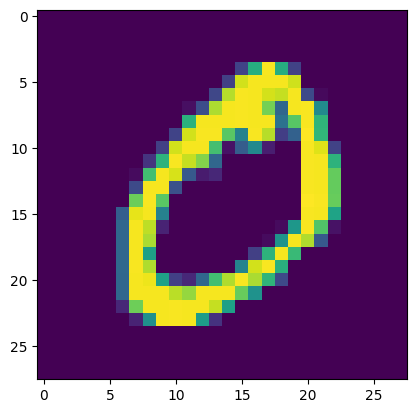

In [66]:
plt.imshow(x_train[1])

In [67]:
x_train = x_train/255
x_test = x_test/255

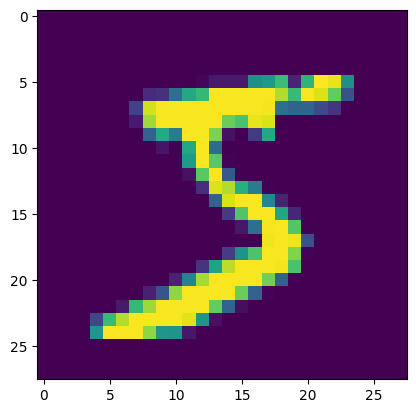

In [68]:
plt.imshow(x_train[0])

In [69]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(500, activation="relu"))
model.add(Dense(364, activation="relu"))
model.add(Dense(182, activation="relu"))
model.add(Dense(91, activation="relu"))
model.add(Dense(10, activation="softmax"))

c:\Users\91909\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 364)            │       182,364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 182)            │        66,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 91)             │        16,653 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           920 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 658,867 (2.51 MB)

 Trainable params: 658,867 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [72]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8817 - loss: 0.3863 - val_accuracy: 0.9613 - val_loss: 0.1260
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9680 - loss: 0.1048 - val_accuracy: 0.9717 - val_loss: 0.1016
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9800 - loss: 0.0677 - val_accuracy: 0.9704 - val_loss: 0.1020
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9847 - loss: 0.0526 - val_accuracy: 0.9745 - val_loss: 0.0898
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9865 - loss: 0.0450 - val_accuracy: 0.9752 - val_loss: 0.0972
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9890 - loss: 0.0346 - val_accuracy: 0.9755 - val_loss: 0.1145
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9911 - loss: 0.0323 - val_accuracy: 0.9787 - val_loss: 0.0950
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9916 -

In [73]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [81]:
y_prob

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        3.3822468e-38, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.4191733e-28, 9.3891291e-36, 5.1897150e-38, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [74]:
y_pred = y_prob.argmax(axis=1)

In [75]:
accuracy_score(y_test, y_pred)

0.9817

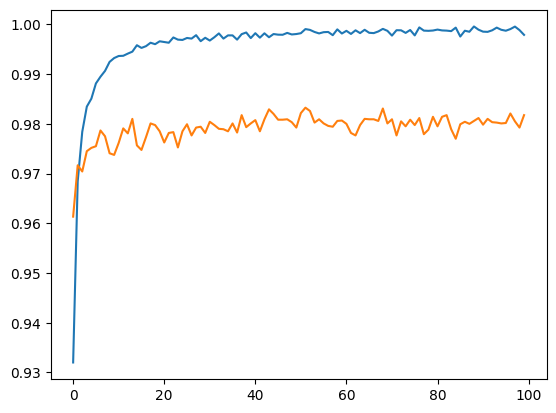

In [76]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [77]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [79]:
t_prob = model.predict(num_data)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [80]:
t_prob

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 7.4117446e-25, ..., 0.0000000e+00,
        0.0000000e+00, 1.3515237e-28],
       [1.9346811e-20, 5.7821710e-21, 1.8048396e-23, ..., 1.9097600e-10,
        1.2872783e-10, 9.9999475e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 5.6516351e-38, ..., 0.0000000e+00,
        0.0000000e+00, 1.1088155e-27],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3833506e-23,
        7.9582229e-26, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [82]:
t_pred = t_prob.argmax(axis=1)

In [87]:
t_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [84]:
ds = pd.read_csv("digit-recognizer/sample_submission.csv")

In [85]:
ds

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [88]:
ds.Label = t_pred

In [89]:
ds

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [90]:
ds.to_csv("Submission2.csv", index=False)